# Simpler EDA - Modelling pipeline

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import joblib
import zipfile



In [73]:
# zip_path = r'c:\Users\owner\Downloads\wine+quality.zip'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.printdir()
#     zip_ref.extractall('Datasets')

In [74]:
# with zipfile.ZipFile(zip_path) as z:
#     with z.open('winequality-white.csv') as f:
#         w_wine = pd.read_csv(f, sep=';')

In [75]:
def load_data(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.printdir()
        zip_ref.extractall('Datasets')

    with zipfile.ZipFile(zip_path) as z:
        with z.open('winequality-white.csv') as f:
            w_wine = pd.read_csv(f, sep=";")
            white_wine = w_wine.copy()
    return white_wine


In [76]:
zip_path = r"c:\Users\owner\Downloads\wine+quality.zip"
df = load_data(zip_path)

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [77]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# EDA

In [78]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [79]:
df["quality"].value_counts(ascending=False)

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [80]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [81]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [82]:
# # Reclassify
# def reclassify(df):
#     df = df.replace({"quality": {9: "Best", 8: "Best", 7: "Good", 6: "Good", 5: "Average", 4: "Bad", 3: "Bad"}})
#     return df.head()

In [83]:
# df = reclassify(df)

In [84]:
df = df.replace({"quality": {9: "Best", 8: "Best", 7: "Good", 6: "Good", 5: "Average", 4: "Bad", 3: "Bad"}})

In [85]:
df.shape

(4898, 12)

## Preprocessing

In [86]:
X = df.drop(columns="quality")
y = df["quality"]

### Scaling

In [87]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

### Data splitting

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=234, stratify=y)

## Modelling

In [89]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbours": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

Training LogisticRegression...
LogisticRegression Accuracy: 0.705


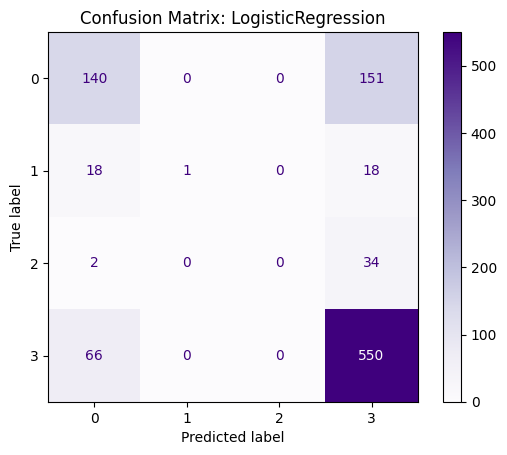

Training Random Forest...
Random Forest Accuracy: 0.799


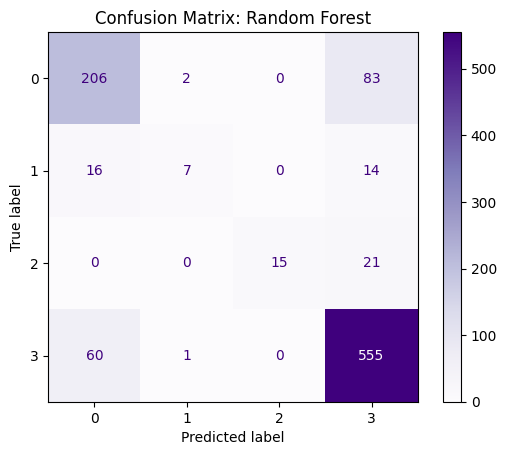

Training Decision Tree...
Decision Tree Accuracy: 0.722


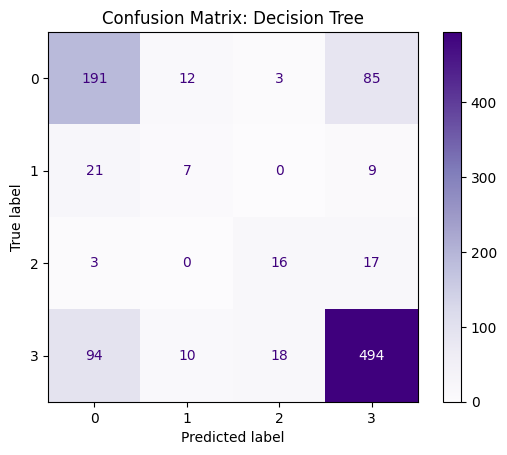

Training K-Nearest Neighbours...
K-Nearest Neighbours Accuracy: 0.710


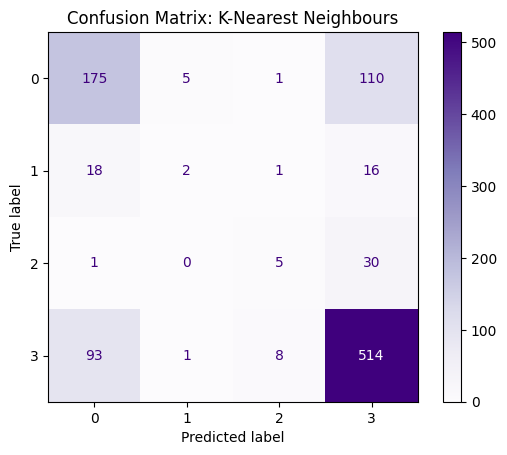

Training Naive Bayes...
Naive Bayes Accuracy: 0.629


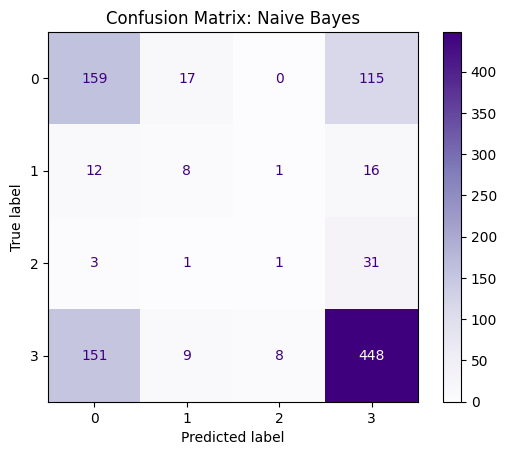

,Model,Accuracy
1,Random Forest,0.798980
2,Decision Tree,0.722449
3,K-Nearest Neighbours,0.710204
0,LogisticRegression,0.705102
4,Naive Bayes,0.628571


In [90]:
# Initializing a dictionary to store the models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.3f}")

    #Adding confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    #Plotting with model name as title
    disp.plot(cmap='Purples')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

result_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])
result_df = result_df.sort_values(by="Accuracy", ascending=False)
result_df.reset_index(drop=True)
result_df

## Hyper parameter Tuning

In [91]:
#creating an instance of the best model
rf = RandomForestClassifier()
# exacting the pareameters of the model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [92]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [93]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=234, n_jobs=-1)
random_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest {random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best parameters for Random Forest {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


### Cross validation

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good


In [95]:
best_model = random_search.best_estimator_
#might be x_train againt y_train
cv_score = cross_val_score(best_model, X_scaled, y, cv=5)
# cv_score = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross validation scores for Random Forest : {cv_score}")
print(f"Mean cross validation score: {cv_score.mean()}")

Cross validation scores for Random Forest : [0.65510204 0.66632653 0.69897959 0.68845761 0.72522983]
Mean cross validation score: 0.6868191198849305


In [96]:
y_pred = best_model.predict(X_test)
print(f"\nClassification Report: ")
print(classification_report(y_test, y_pred, zero_division=1))


Classification Report: 
              precision    recall  f1-score   support

     Average       0.74      0.70      0.72       291
         Bad       0.60      0.16      0.26        37
        Best       0.93      0.39      0.55        36
        Good       0.82      0.91      0.87       616

    accuracy                           0.80       980
   macro avg       0.78      0.54      0.60       980
weighted avg       0.80      0.80      0.79       980



## Save model

In [97]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved successfully!")

Model and scaler saved successfully!
